<a href="https://colab.research.google.com/github/camaartins/modulo1_EBA/blob/main/Atividade_1_EBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Exercício proposto:**
### Somos a primeira analista de dados contratada de u ma rede imoiliária nos EUA e recebemos uma base de dados que contém casas vendidas. Temos a missão de, usando apenas **estatística descritiva**, entender como os dados se comportam e entender algumas variáveis que podem impactar no preço das casas.

#Iniciando importação

In [1]:
# importando as bibliotecas

import pandas as pd #para manipular tabelas
import seaborn as sns #para manipular gráficos
import numpy as np #para fazer operações matemáticas
import matplotlib.pyplot as plt #para manipular gráficos

In [6]:
#importando a tabela

df = pd.read_csv("house_price.csv")
df.head()

,Unnamed: 0,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt,MSZoning,Utilities,BldgType
0,0,208500,7,5,3,8,1710,856,2003,RL,AllPub,1Fam
1,1,181500,6,8,3,6,1262,1262,1976,RL,AllPub,1Fam
2,2,223500,7,5,3,6,1786,920,2001,RL,AllPub,1Fam
3,3,140000,7,5,3,7,1717,756,1915,RL,AllPub,1Fam
4,4,250000,8,5,4,9,2198,1145,2000,RL,AllPub,1Fam


# Entendendo as colunas do meu df:

**SalePrice:** preço de venda da minha casa

**OverallQual:** condição geral do material de acabamento da casa, corretores dão a nota geral. Vai de 0 a 10.

**OverallCond:** condição geral da casa, nota geral que foi dada para a casa. Vai de 0 a 10.

**BedroomAbvGr:** quantidade de quartos acima do solo (sem contar porão).

**TotRmsAbvGrd:** quantidade total de cômodos acima do solo (sem contar porão).

**GrLivArea:** área total da casa acima do solo. Medida em ft.

**TotalBsmtSF:** total da área do porão. Medida em ft.

**YearBuilt:** ano de construção.

**MSZoning:** zona em que se encontra (comercial, rural etc).

**Utilities:** mostra se a casa tinha gás/água encanada etc.

**BidgType:** tipo da casa (só uma, germinada etc).

In [7]:
# analisando o tipo de dados que estou trabalhando

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1460 non-null   int64 
 1   SalePrice     1460 non-null   int64 
 2   OverallQual   1460 non-null   int64 
 3   OverallCond   1460 non-null   int64 
 4   BedroomAbvGr  1460 non-null   int64 
 5   TotRmsAbvGrd  1460 non-null   int64 
 6   GrLivArea     1460 non-null   int64 
 7   TotalBsmtSF   1460 non-null   int64 
 8   YearBuilt     1460 non-null   int64 
 9   MSZoning      1460 non-null   object
 10  Utilities     1460 non-null   object
 11  BldgType      1460 non-null   object
dtypes: int64(9), object(3)
memory usage: 137.0+ KB


Primeira coisa quando se começa uma análise é ver se tem nulos no df. Nulo é uma célula que não foi preenchida, e isso pode prejudicar a análise

In [10]:
df.isnull().sum()

# pode ser df.isna().sum() também

Unnamed: 0      0
SalePrice       0
OverallQual     0
OverallCond     0
BedroomAbvGr    0
TotRmsAbvGrd    0
GrLivArea       0
TotalBsmtSF     0
YearBuilt       0
MSZoning        0
Utilities       0
BldgType        0
dtype: int64

Como nenhuma coluna minha tem valor vazio, posso seguir a análise tranquilamente que não serei prejudicada. Caso alguma coluna tivesse vários valores vazios, eu deveria buscar outra coluna com informação equivalente para trabalhar.

# Análise prévia da coluna SalePrice

In [11]:
# Fazendo algumas estatísticas descritivas

mean = df['SalePrice'].mean() #média
median = df['SalePrice'].median() #mediana
mode = df['SalePrice'].mode() #moda

print('mean:', mean, 'median:', median, 'mode:', mode)

mean: 180921.19589041095 median: 163000.0 mode: 0    140000
Name: SalePrice, dtype: int64


Tenho média: 180921.19589041095, mediana: 163000.0 e moda: 140000.
Como pode ser notado, minha média é bem maior que a mediana, isso pode indicar que existe algum outlier puxando minha média para cima. Abaixo buscarei a comprovação disso.

<Axes: ylabel='SalePrice'>

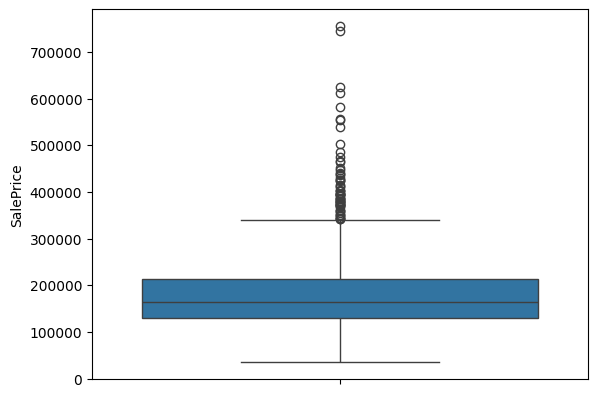

In [13]:
sns.boxplot(df.SalePrice)

O limite inferior está abaixo de 100.000 e vale ressaltar que não tem outlier abaixo disso. A mediana está como verificado anteriormente, proxima de 163.000. O Limite superior proximo de 350.000 e acima disso tem vários outliers. Esses valores são os que, provavelmente, estão causando a discrepância da média com a mediana. Agora, para melhor definição de valores, vamos analisar os principais cálculos para a coluna SalePrice.

In [14]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Hipóteses

É interessante criar hipóteses para tentar validá-las com dados. Assim:

Das variáveis **numéricas**, podemos pensar em algumas hipóteses:

1.   A média/mediana da qualidade do imóvel é superior para os apartamentos mais caros;
2. A média/mediana da quantidade de cômodos/quartos/área/banheiros é maior em apartamentos mais caros;
3. Os apartamentos mais caros são mais antigos.

Das variáveis **categóricas**, podemos pensar em algumas hipóteses:
4. Existe diferença de preço de acordo com sua localização (zona);
5. As utilidades (água, gás etc) existentes na casa tem influência no preço;
6. O tipo de habitação influencia o preço (duplex, condomínio etc).







# Análise numérica

In [16]:
#verificando se tem indício de outlier e se os dados fazem sentido

df.describe()

,Unnamed: 0,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,729.500000,180921.195890,6.099315,5.575342,2.866438,6.517808,1515.463699,1057.429452,1971.267808
std,421.610009,79442.502883,1.382997,1.112799,0.815778,1.625393,525.480383,438.705324,30.202904
min,0.000000,34900.000000,1.000000,1.000000,0.000000,2.000000,334.000000,0.000000,1872.000000
25%,364.750000,129975.000000,5.000000,5.000000,2.000000,5.000000,1129.500000,795.750000,1954.000000
50%,729.500000,163000.000000,6.000000,5.000000,3.000000,6.000000,1464.000000,991.500000,1973.000000
75%,1094.250000,214000.000000,7.000000,6.000000,3.000000,7.000000,1776.750000,1298.250000,2000.000000
max,1459.000000,755000.000000,10.000000,9.000000,8.000000,14.000000,5642.000000,6110.000000,2010.000000


Para validarmos as hipóteses, vamos criar uma coluna que nos diga se a casa era "cara" ou se a casa era "barata" - sendo que o que definimos como "cara" são as casas acima do percentil 75 (214k) e como "baratas" as casas abaixo desse percentil 75. (algo arbitrário)

In [18]:
df['categoria_preco'] = np.where(df['SalePrice']>214000, 'cara', 'barata')

df

,Unnamed: 0,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt,MSZoning,Utilities,BldgType,categoria_preco
0,0,208500,7,5,3,8,1710,856,2003,RL,AllPub,1Fam,barata
1,1,181500,6,8,3,6,1262,1262,1976,RL,AllPub,1Fam,barata
2,2,223500,7,5,3,6,1786,920,2001,RL,AllPub,1Fam,cara
3,3,140000,7,5,3,7,1717,756,1915,RL,AllPub,1Fam,barata
4,4,250000,8,5,4,9,2198,1145,2000,RL,AllPub,1Fam,cara
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,175000,6,5,3,7,1647,953,1999,RL,AllPub,1Fam,barata
1456,1456,210000,6,6,3,7,2073,1542,1978,RL,AllPub,1Fam,barata
1457,1457,266500,7,9,4,9,2340,1152,1941,RL,AllPub,1Fam,cara
1458,1458,142125,5,6,2,5,1078,1078,1950,RL,AllPub,1Fam,barata


Vamos agora começar a calcular as estatísticas de cada uma das categorias criadas.

média: categoria_preco
barata    5.588342
cara      7.649171
Name: OverallQual, dtype: float64
mediana: categoria_preco
barata    6.0
cara      8.0
Name: OverallQual, dtype: float64


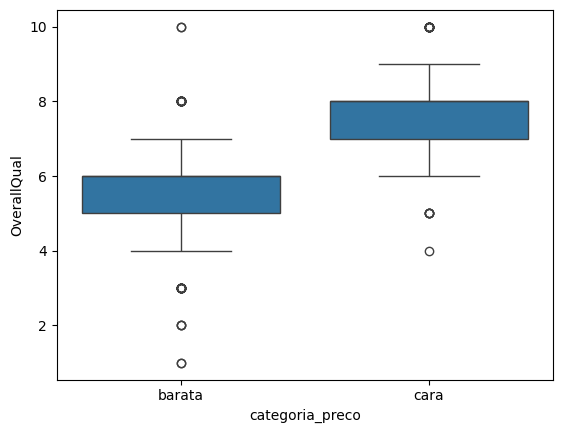

In [22]:
#analisando qualidade de material da casa por categoria de preço

fig = sns.boxplot( x = 'categoria_preco', y = 'OverallQual', data = df)

#agora, vou agrupar o dataset e agrupar por categoria de preço para calcular a média

print('média:', df.groupby('categoria_preco')['OverallQual'].mean())
print('mediana:', df.groupby('categoria_preco')['OverallQual'].median())

No geral, através da análise do boxplot, pode-se notar que as casas mais baratas tendem a ter menor qualidade. Entretanto, existem alguns outliers e até mesmo o limite superior do boxplot, que condiz com o Q1 das casas mais caras. Por isso, para uma informação mais certeira, seria necessário um **teste de hipótese** para avaliar as médias.

média: categoria_preco
barata    5.631148
cara      5.406077
Name: OverallCond, dtype: float64
mediana: categoria_preco
barata    5.0
cara      5.0
Name: OverallCond, dtype: float64


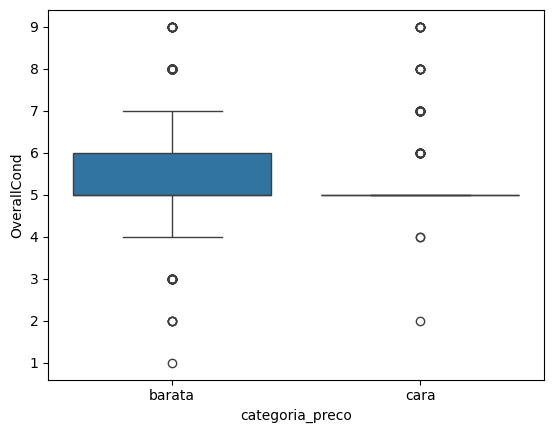

In [24]:
#analisando qualidade geral da casa por categoria de preço
fig = sns.boxplot(x = 'categoria_preco', y = 'OverallCond', data = df)

print('média:', df.groupby('categoria_preco')['OverallCond'].mean())
print('mediana:', df.groupby('categoria_preco')['OverallCond'].median())

Quando se comparam os dois boxplots, o das casas caras está muito estranho. Devemos, então, buscar o porque disso.

In [33]:
#aprofundando na categoria cara para entender porque está estranho o gráfico

# df.query("categoria_preco == 'cara'")[['categoria_preco', 'OverallCond']] também funcionaria

df[df.categoria_preco == 'cara'][['categoria_preco', 'OverallCond']]

,categoria_preco,OverallCond
2,cara,5
4,cara,5
6,cara,5
11,cara,5
13,cara,5
...,...,...
1437,cara,5
1442,cara,5
1447,cara,5
1451,cara,5


In [31]:
df[df.categoria_preco == 'cara'].OverallCond.value_counts()

OverallCond
5    284
7     32
6     25
8      9
9      9
4      2
2      1
Name: count, dtype: int64

Por algum motivo, temos inúmeras notas 5 que fazem com que os outros resultados sejam considerados basicamente como outliers.

média: categoria_preco
barata    6.122951
cara      7.715470
Name: TotRmsAbvGrd, dtype: float64
mediana: categoria_preco
barata    6.0
cara      8.0
Name: TotRmsAbvGrd, dtype: float64


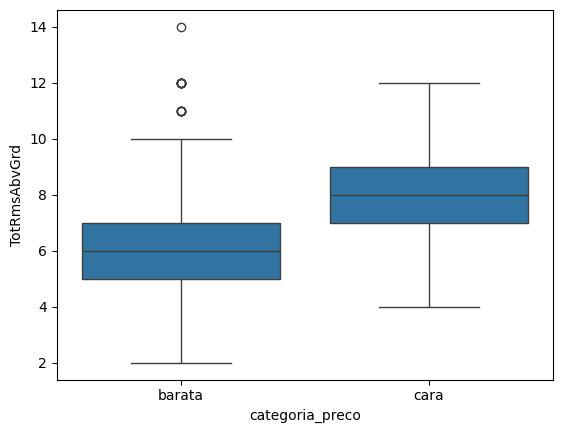

In [35]:
#analisando total de cômodos da casa por categoria de preço

fig = sns.boxplot(x = 'categoria_preco', y = 'TotRmsAbvGrd', data = df)

print('média:', df.groupby('categoria_preco')['TotRmsAbvGrd'].mean())
print('mediana:', df.groupby('categoria_preco')['TotRmsAbvGrd'].median())

média: categoria_preco
barata    1342.642077
cara      2039.657459
Name: GrLivArea, dtype: float64
mediana: categoria_preco
barata    1342.642077
cara      2039.657459
Name: GrLivArea, dtype: float64


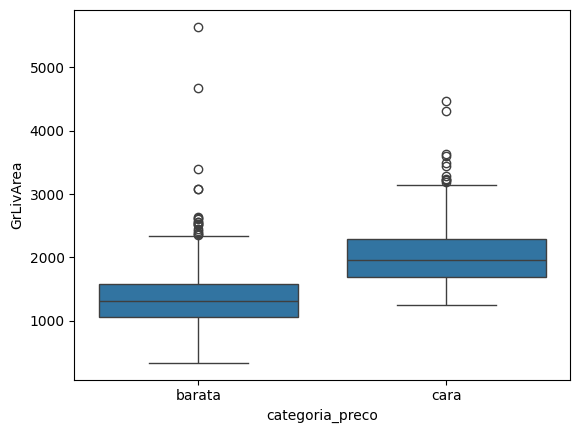

In [37]:
#analisando área total da casa por categoria de preço

fig = sns.boxplot(x= 'categoria_preco', y = 'GrLivArea', data = df)
print('média:', df.groupby('categoria_preco')['GrLivArea'].mean())
print('mediana:', df.groupby('categoria_preco')['GrLivArea'].mean())